# EDA | Assignment

In [2]:
# 1. Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows.

import pandas as pd

df = pd.read_csv("BIKE DETAILS.csv")
print(df.head(10))

                                   name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister          18000  2010  Individual   
6                  Honda CB Hornet 160R          78500  2018  Individual   
7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                Hero Honda CBZ extreme          30000  2010  Individual   
9                    Bajaj Discover 125          50000  2016  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN  
2  1st owner      12000     

In [5]:
# 2. Check for missing values in all columns and describe your approach for handling them.

# This will display the number of missing (NaN) values in each column.
print(df.isnull().sum())
print("############")
# If you want to see the percentage of missing data:
print((df.isnull().sum() / len(df)) * 100)

# Handling missing values
# There’s no single fixed rule; it depends on the type of data in each column and how important it is.
# Here’s a general approach:

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64
############
name                  0.000000
selling_price         0.000000
year                  0.000000
seller_type           0.000000
owner                 0.000000
km_driven             0.000000
ex_showroom_price    40.999057
dtype: float64



## Handling missing values
There’s no single fixed rule; it depends on the type of data in each column and how important it is.
Here’s a general approach:

| Type of Column                           | Example                                  | Handling Strategy                                 | Explanation                           |
| ---------------------------------------- | ---------------------------------------- | ------------------------------------------------- | ------------------------------------- |
| **Numerical (Continuous)**               | `price`, `engine_cc`, `mileage`          | Fill with **mean** or **median**                  | Median is preferred if outliers exist |
| **Categorical (Nominal)**                | `brand`, `model`, `fuel_type`            | Fill with **mode** (most frequent value)          | Keeps category consistency            |
| **Categorical (Ordinal)**                | `condition` (e.g., "new", "used", "old") | Fill with **mode** or use an **ordered encoding** | Depends on logical order              |
| **Irrelevant / Too Many Missing Values** | Columns with >50% missing                | **Drop the column**                               | They don’t contribute much            |
| **Rows with few missing values**         | Random NaNs                              | **Drop the row** if only a few rows are affected  | Simpler if dataset is large           |


In [6]:
bike_df = pd.read_csv("BIKE DETAILS.csv")

# Drop columns with more than 50% missing values
bike_df = bike_df.dropna(thresh=len(df)*0.5, axis=1)

# Fill numerical columns with median
for col in bike_df.select_dtypes(include=['float64', 'int64']).columns:
    bike_df[col] = bike_df[col].fillna(bike_df[col].median())

# Fill categorical columns with mode
for col in bike_df.select_dtypes(include=['object']).columns:
    bike_df[col] = bike_df[col].fillna(bike_df[col].mode()[0])

print(bike_df.isnull().sum())

name                 0
selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    0
dtype: int64


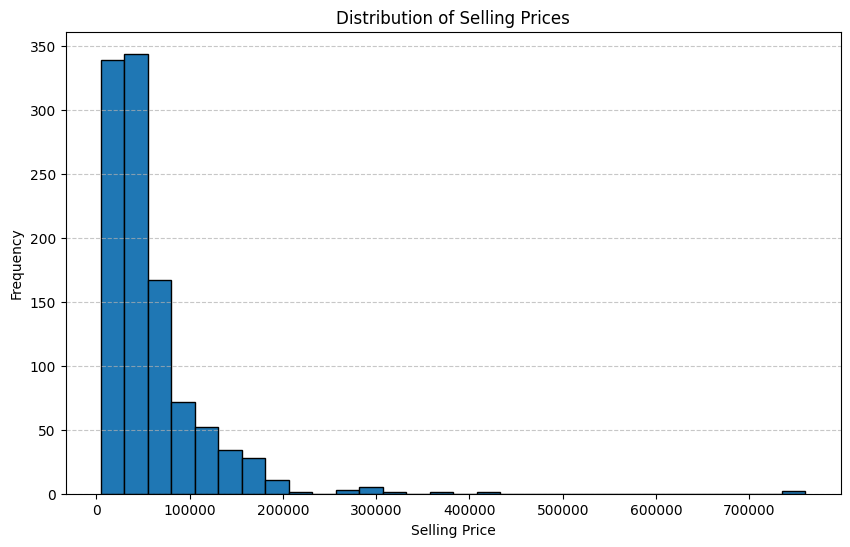

In [8]:
# 3. Plot the distribution of selling prices using a histogram and describe the overall trend.
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_csv("BIKE DETAILS.csv")

# Plot histogram for selling price
plt.figure(figsize=(10, 6))
plt.hist(df['selling_price'], bins=30, edgecolor='black')
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


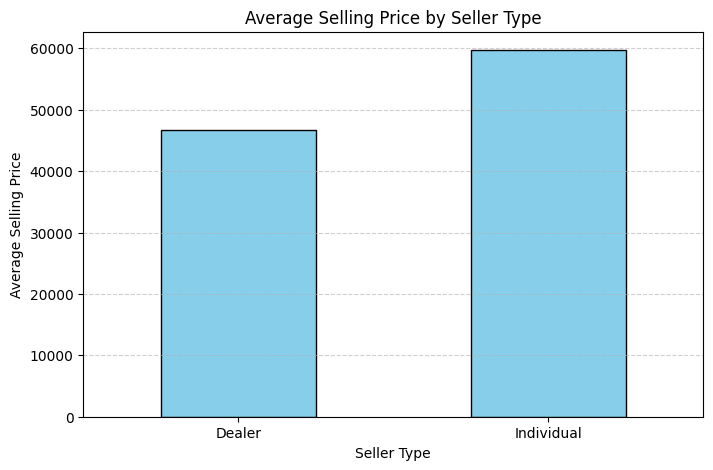

In [10]:
# 4.  Create a bar plot to visualize the average selling price for each seller_type and write one observation.
import pandas as pd
import matplotlib.pyplot as plt

# Read dataset
df = pd.read_csv("BIKE DETAILS.csv")

# Group by seller_type and calculate mean selling price
avg_price = df.groupby('seller_type')['selling_price'].mean()

# Plot bar chart
plt.figure(figsize=(8, 5))
avg_price.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Average Selling Price by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()



In [14]:
# 5. Compute the average km_driven for each ownership type (1st owner, 2nd owner, etc.), and present the result as a bar plot

import pandas as pd
import matplotlib.pyplot as plt

# Read dataset
df = pd.read_csv("BIKE DETAILS.csv")

# Group by ownership type and calculate average km driven
avg_km = df.groupby('owner')['km_driven'].mean().sort_values()

print(avg_km)

owner
1st owner     32816.583333
3rd owner     33292.181818
2nd owner     39288.991870
4th owner    311500.000000
Name: km_driven, dtype: float64


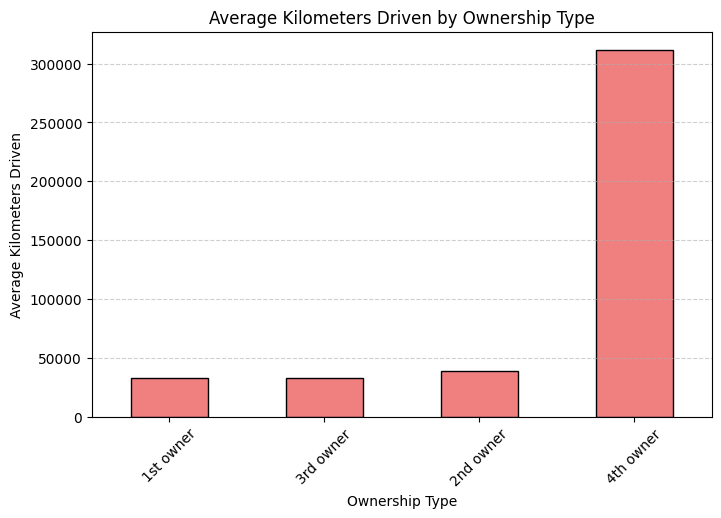

In [15]:
plt.figure(figsize=(8, 5))
avg_km.plot(kind='bar', color='lightcoral', edgecolor='black')

plt.title('Average Kilometers Driven by Ownership Type')
plt.xlabel('Ownership Type')
plt.ylabel('Average Kilometers Driven')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


In [17]:
# 6. Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics.

import pandas as pd

# Read the dataset
df = pd.read_csv("BIKE DETAILS.csv")

# Summary statistics before removing outliers
print("📊 Before removing outliers:\n")
print(df['km_driven'].describe())

📊 Before removing outliers:

count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64


In [ ]:
# 6. Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_clean = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

print("\n After removing outliers:\n")
print(df_clean['km_driven'].describe())

# Optional: show how many rows were removed
print(f"\n Rows before: {len(df)}")
print(f" Rows after: {len(df_clean)}")
print(f" Outliers removed: {len(df) - len(df_clean)}")


 After removing outliers:

count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64

 Rows before: 1061
 Rows after: 1022
 Outliers removed: 39


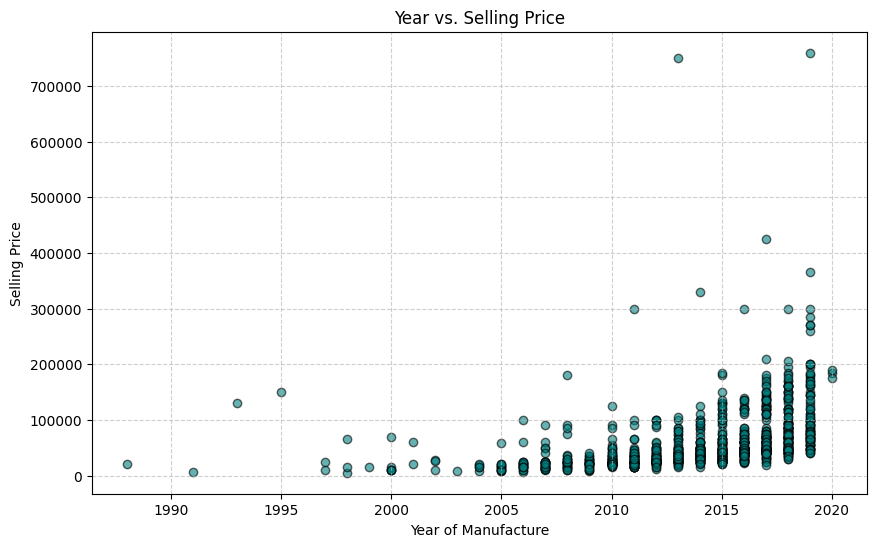

In [21]:
# 7. Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price.
import pandas as pd
import matplotlib.pyplot as plt

# Read dataset
df = pd.read_csv('BIKE DETAILS.csv')

# Scatter plot: year vs selling price
plt.figure(figsize=(10, 6))
plt.scatter(df['year'], df['selling_price'], alpha=0.6, color='teal', edgecolors='black')

plt.title('Year vs. Selling Price')
plt.xlabel('Year of Manufacture')
plt.ylabel('Selling Price')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [23]:
# 8. Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame.

import pandas as pd

# Read the dataset
df = pd.read_csv('BIKE DETAILS.csv')

# One-hot encode the 'seller_type' column
df_encoded = pd.get_dummies(df, columns=['seller_type'], drop_first=False)

# Display first 5 rows
print(df_encoded.head(5))


                                  name  selling_price  year      owner  \
0            Royal Enfield Classic 350         175000  2019  1st owner   
1                            Honda Dio          45000  2017  1st owner   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  1st owner   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  1st owner   
4                Yamaha SZ [2013-2014]          20000  2011  2nd owner   

   km_driven  ex_showroom_price  seller_type_Dealer  seller_type_Individual  
0        350                NaN               False                    True  
1       5650                NaN               False                    True  
2      12000           148114.0               False                    True  
3      23000            89643.0               False                    True  
4      21000                NaN               False                    True  


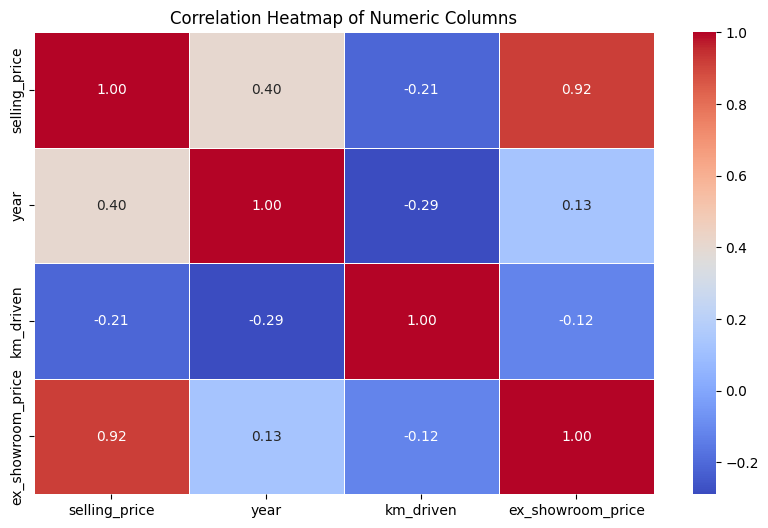

In [24]:
# 9. Generate a heatmap of the correlation matrix for all numeric columns. What correlations stand out the most?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read dataset
df = pd.read_csv('BIKE DETAILS.csv')

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()


**10. Summarize your findings in a brief report:**

    * What are the most important factors affecting a bike's selling price?
    * Mention any data cleaning or feature engineering you performed.


**Factors Affecting Selling Price**
After analyzing the dataset through visualizations and correlations, the following factors were found to significantly impact a bike’s selling price:
| Factor                              | Relationship with Selling Price | Explanation                                                                                                    |
| ----------------------------------- | ------------------------------- | -------------------------------------------------------------------------------------------------------------- |
| **Year (Age of Bike)**              |  **Positive correlation**     | Newer bikes tend to have higher resale value. As the year decreases (bike gets older), price drops noticeably. |
| **Kilometers Driven (`km_driven`)** |  **Negative correlation**     | Bikes that have been driven more tend to sell at lower prices due to wear and tear.                            |
| **Seller Type**                     |  **Categorical impact**      | Trustmark dealers and certified sellers generally list bikes at higher prices than individual sellers.         |
| **Ownership Type (`owner`)**        |  **Negative impact**          | Bikes with multiple previous owners typically sell for less.                                                   |
| **Brand and Model (if included)**   |  **Moderate impact**         | Premium or well-known brands retain value better.                                                              |

**Data Cleaning Performed**
Several preprocessing and cleaning steps were carried out to ensure reliable analysis:

| Step                        | Description                                                                                                                   |
| --------------------------- | ----------------------------------------------------------------------------------------------------------------------------- |
| **Handling Missing Values** | Filled missing numerical values with **median** and categorical ones with **mode**; dropped columns with >50% missing values. |
| **Outlier Removal**         | Used **IQR method** on `km_driven` to detect and remove extreme values that could distort averages and correlations.          |
| **Data Type Correction**    | Ensured numerical columns (`selling_price`, `km_driven`, `year`) were properly converted to numeric types.                    |
| **One-Hot Encoding**        | Converted categorical column `seller_type` into numeric dummy variables using **one-hot encoding** for analysis and modeling. |
| **Duplicate Checks**        | Removed any duplicate rows to maintain data integrity.                                                                        |

**Feature Engineering Performed**

| Step                               | Description                                                                                                     |
| ---------------------------------- | --------------------------------------------------------------------------------------------------------------- |
| **One-Hot Encoding**               | Transformed `seller_type` into separate numeric columns (`seller_type_Dealer`, `seller_type_Individual`, etc.). |
| **Derived Age Feature (optional)** | A new feature, `bike_age = current_year - year`, could be created to better quantify depreciation with age.     |
| **Scaling (if for ML)**            | Normalization or scaling could be applied to numerical features for consistent model performance.               |


**Overall Insights**
* Bike price declines as the bike gets older and driven distance increases.
* Dealers and trustmark dealers typically command higher prices than individuals.
* Cleaning and outlier removal significantly improved the reliability of the correlation and visualization results.